#  Deep Learning : Training DL networks



## Part 1. Writing a custom dataset based on Fashion-MNIST 

### Part 1.1. Define a Dataset class 

In [1]:
!pip install onedrivedownloader

In [2]:
from onedrivedownloader import download
import os

link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/hliu22_univ_yo_oulu_fi/EatDho3877JMlYugij_sKBkBqRz5s8hvmC1DQb0LT-W-lA?e=vkdebU'

if not os.path.exists('./data/fashion_mnist_npy'):
    print('Downloading dataset')
    download(link, filename="./fashion_mnist_npy_hw3.zip", unzip=True, unzip_path='./data/fashion_mnist_npy')

In [3]:
# import necessary packages
import os 
import torch 
import requests, zipfile, sys
import numpy as np
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms


# fashion_MNIST dataset 
data_dir='./data/fashion_mnist_npy/'
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
train_label = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_label = np.load(os.path.join(data_dir, 'test_labels.npy'))

# select 5 classes
selected_classes = [0, 1, 2, 3, 4]

# choose the data from the selected 5 classes
train_mask = np.isin(train_label, selected_classes)
train_data = train_data[train_mask]
train_label = train_label[train_mask]

test_mask = np.isin(test_label, selected_classes)
test_data = test_data[test_mask]
test_label = test_label[test_mask]

# split the training data to a new training data and validation data
class_indices = [[] for i in range(5)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# take the first 1000 indices of indices_all
indices = indices_all[:1000]
# take the rest of the indices of indices_all
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []
for i in range(5):
    # build indices for validation set
    valid_indices.extend(np.array(class_indices[i])[indices])
    # TODO: build indices for training set (0.25 points)
    # your code here 
    train_indices.extend(np.array(class_indices[i])[indices_rest])
    
    
# write the custom dataset based on the dataset
class FashionMnist(Dataset):
    """Fashion Mnist dataset""" 

    def __init__(self, phase='train', transform=None):

        # TODO: now, split the predefined training data (1.5 points)
        # Make the examples of training, valid, and test as 25000, 5000 and 5000, and make samples in each category be balance.
        if 'train' == phase:
            # your code here
            self.data = train_data[train_indices]
            self.label = train_label[train_indices]            

        elif 'valid' == phase:
            # your code here 
            self.data = train_data[valid_indices]
            self.label = train_label[valid_indices]           

        elif 'test' == phase:
            # your code here
            self.data = test_data
            self.label = test_label               

        else:
            assert True, 'wrong phase'
            

        self.transform = transform 
        
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        
        # TODO: get image and label according to the index (0.25 points)
        # your code here 
        img, label = self.data[index], self.label[index]        

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img, mode='L')

        if self.transform is not None:
            img = self.transform(img)

        return img, label


### Part 1.2. Dataset checking 

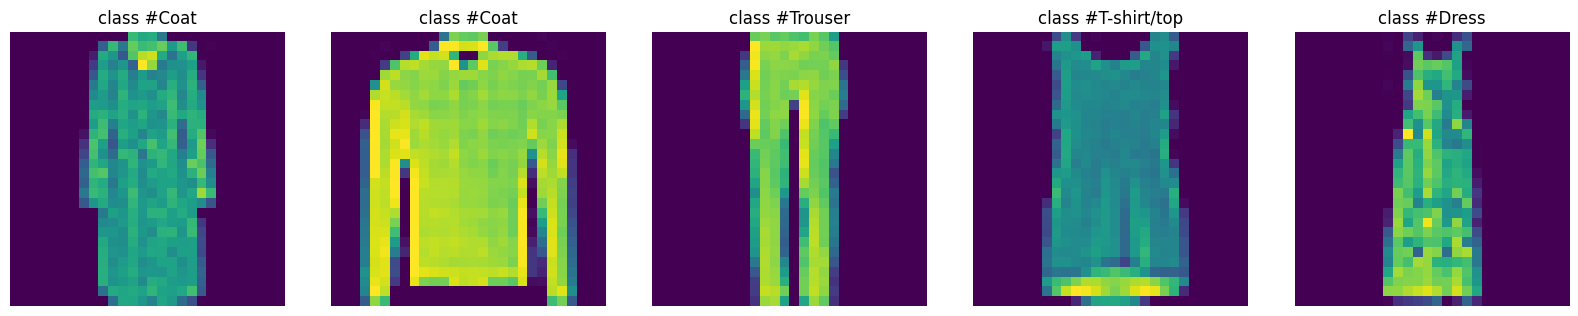

total number of training set: 25000
numer of images for class T-shirt/top: 5000
numer of images for class Trouser: 5000
numer of images for class Pullover: 5000
numer of images for class Dress: 5000
numer of images for class Coat: 5000


In [4]:
# checking training set
# randomly show some samples and their labels
# TODO: create a FashionMnist dataset for training, set transform to None (0.5 points)
# your code here
train_set = FashionMnist(phase='train', transform=None) #this is the first 0.25 points, see the rest 0.25 points in Part 1.3

num_to_show = 5
idx = np.random.choice(range(len(train_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_set[idx[i]] 
    label_name = train_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_set)))
for i in range(5):
    print('numer of images for class {}: {}'.format(train_set.label_names[i], np.sum(train_set.label==i)))

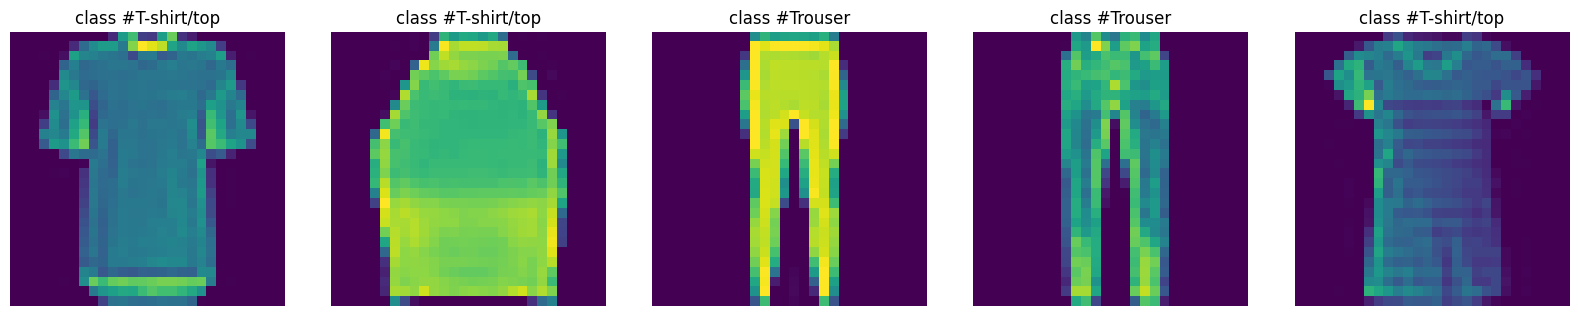

total number of validation set: 5000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000


In [5]:
# TODO:checking validation data (1 points)
# your code here, like the training set, the output in this section should be like this (you can have your own visualization style)
valid_set = FashionMnist(phase='valid', transform=None)  #this is the first 0.25 points, see the rest 0.25 points in Part 1.3

num_to_show = 5
idx = np.random.choice(range(len(valid_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = valid_set[idx[i]] 
    label_name = valid_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
#   plt.imshow(np.asarray(image).squeeze(), cmap='gray')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of validation set: {}'.format(len(valid_set)))
for i in range(5):
    print('numer of images for class {}: {}'.format(valid_set.label_names[i], np.sum(valid_set.label==i)))



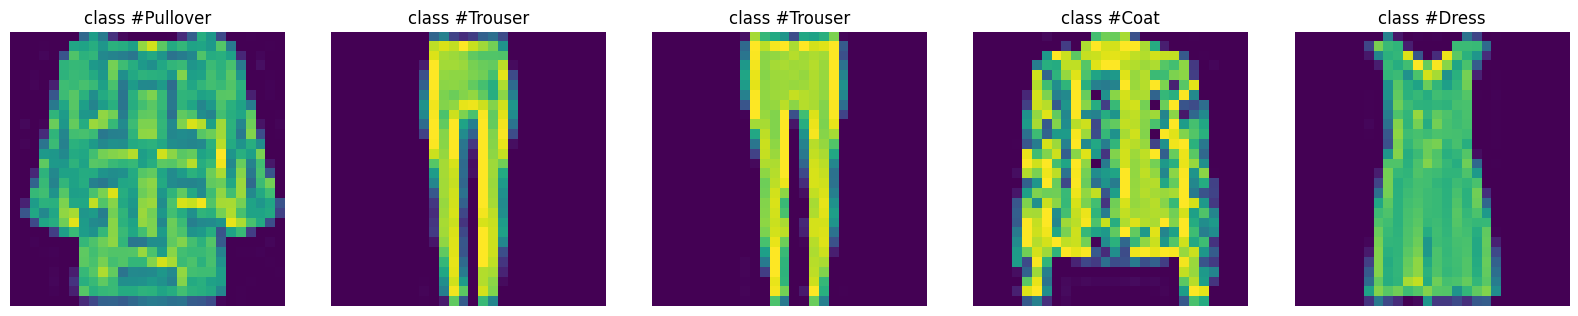

total number of testing set: 5000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000


In [6]:
# TODO: checking testing data (1 points)
# your code here
test_set = FashionMnist(phase='test', transform=None)  #this is the first 0.25 points, see the rest 0.25 points in Part 1.3

num_to_show = 5
idx = np.random.choice(range(len(test_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_set[idx[i]] 
    label_name = test_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
#   plt.imshow(np.asarray(image).squeeze(), cmap='gray')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of testing set: {}'.format(len(test_set)))
for i in range(5):
    print('numer of images for class {}: {}'.format(test_set.label_names[i], np.sum(test_set.label==i)))




### Part 1.3. Iterating through the dataset with batches 


In [7]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux, 
# it is possible to try more workers to do multi-process parallel reading.
data_transform = transforms.Compose([transforms.ToTensor()])

train_set = FashionMnist(phase='train', transform=data_transform) #the other 0.25 points for create a FashionMnist dataset for training
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
# your code here 
test_set = FashionMnist(phase='test', transform=data_transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)
valid_set = FashionMnist(phase='valid', transform=data_transform)
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=False, num_workers=0)


## Part 2. Build a CNN on your own 

To define your own Network, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.

In [8]:
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # TODO: rest of layers (1.5 points)  
        # your code here
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.relu3 = nn.ReLU()
        
        self.fc2 = nn.Linear(128, num_classes)
        # ...

    def forward(self, x):
        x = self.conv1(x) 
        x = self.bn1(x)  
        x = self.relu1(x)  
        x = self.pool(x)

        # TODO: fill the rest part, you may need more lines like x = ... (2 points)
        # your code here
        x = self.conv2(x)
        
        x = self.bn2(x)
        
        x = self.relu2(x)
        
        x = self.pool2(x)
                
        x = x.view(-1, 64 * 5 * 5) 
        
        x = self.fc1(x)
        
        x = self.relu3(x)
        
        x = self.fc2(x)

        return x


## Part 3. Train and test your CNN model


In [9]:
# instantiate a network
net = Network(num_classes=5)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0)


    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
        
    epoches = 10
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            optimizer.zero_grad()
            outs = net(images) 
            loss = loss_function(outs, labels)
            loss.backward()
            optimizer.step()
            preds = outs.argmax(dim=1)
            correct += preds.eq(labels).sum().item()
            num_images += len(labels)            
            
        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

### Part 3.2. Train and test your network 

In [10]:
print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here
trained_net = train(net, train_loader, valid_loader)

# TODO: test your network here on
acc_test = eval(trained_net, test_loader)

print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.873640, loss: 0.108417, valid accuracy: 0.914800
epoch: 1, lr: 0.010000, accuracy: 0.916960, loss: 0.109324, valid accuracy: 0.921200
epoch: 2, lr: 0.010000, accuracy: 0.928960, loss: 0.047823, valid accuracy: 0.927600
epoch: 3, lr: 0.010000, accuracy: 0.938680, loss: 0.056533, valid accuracy: 0.929600
epoch: 4, lr: 0.010000, accuracy: 0.943160, loss: 0.064582, valid accuracy: 0.933800
epoch: 5, lr: 0.010000, accuracy: 0.952080, loss: 0.208808, valid accuracy: 0.932800
epoch: 6, lr: 0.010000, accuracy: 0.954600, loss: 0.120454, valid accuracy: 0.933000
epoch: 7, lr: 0.010000, accuracy: 0.958120, loss: 0.100162, valid accuracy: 0.929000
epoch: 8, lr: 0.010000, accuracy: 0.959400, loss: 0.289316, valid accuracy: 0.936600
epoch: 9, lr: 0.010000, accuracy: 0.966640, loss: 0.106166, valid accuracy: 0.937000
accuracy on testing data: 0.933600


### Part 3.3. Modification for your training 


### WEIGHT DECAY

In [11]:
#****WEIGHT DECAY

#  TODO: Improve your network performance here
 # instantiate a network
net = Network(num_classes=5)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.7, weight_decay=0.0001)


    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
        
    epoches = 10
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            optimizer.zero_grad()
            outs = net(images) 
            loss = loss_function(outs, labels)
            loss.backward()
            optimizer.step()
            preds = outs.argmax(dim=1)
            correct += preds.eq(labels).sum().item()
            num_images += len(labels)            
            
        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here
trained_net = train(net, train_loader, valid_loader)

# TODO: test your network here on
acc_test = eval(trained_net, test_loader)

print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:

 
#  a reference output is provided below:

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.870920, loss: 0.324912, valid accuracy: 0.905400
epoch: 1, lr: 0.010000, accuracy: 0.915320, loss: 0.237961, valid accuracy: 0.922200
epoch: 2, lr: 0.010000, accuracy: 0.928560, loss: 0.055682, valid accuracy: 0.927000
epoch: 3, lr: 0.010000, accuracy: 0.935400, loss: 0.043890, valid accuracy: 0.922400
epoch: 4, lr: 0.010000, accuracy: 0.938600, loss: 0.180154, valid accuracy: 0.928000
epoch: 5, lr: 0.010000, accuracy: 0.944560, loss: 0.125482, valid accuracy: 0.930200
epoch: 6, lr: 0.010000, accuracy: 0.949680, loss: 0.113018, valid accuracy: 0.926800
epoch: 7, lr: 0.010000, accuracy: 0.951760, loss: 0.212010, valid accuracy: 0.920000
epoch: 8, lr: 0.010000, accuracy: 0.957080, loss: 0.317665, valid accuracy: 0.930000
epoch: 9, lr: 0.010000, accuracy: 0.962200, loss: 0.106011, valid accuracy: 0.930400
accuracy on testing data: 0.923400


### MORE EPOCHES

In [12]:
#****MORE EPOCHES

#  TODO: Improve your network performance here
 # instantiate a network
net = Network(num_classes=5)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0)


    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
        
    epoches = 20
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            optimizer.zero_grad()
            outs = net(images) 
            loss = loss_function(outs, labels)
            loss.backward()
            optimizer.step()
            preds = outs.argmax(dim=1)
            correct += preds.eq(labels).sum().item()
            num_images += len(labels)            
            
        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here
trained_net = train(net, train_loader, valid_loader)

# TODO: test your network here on
acc_test = eval(trained_net, test_loader)

print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.872280, loss: 0.361149, valid accuracy: 0.870800
epoch: 1, lr: 0.010000, accuracy: 0.917960, loss: 0.263742, valid accuracy: 0.911600
epoch: 2, lr: 0.010000, accuracy: 0.926880, loss: 0.271519, valid accuracy: 0.926600
epoch: 3, lr: 0.010000, accuracy: 0.936800, loss: 0.404834, valid accuracy: 0.932400
epoch: 4, lr: 0.010000, accuracy: 0.941560, loss: 0.146818, valid accuracy: 0.932000
epoch: 5, lr: 0.010000, accuracy: 0.947560, loss: 0.040540, valid accuracy: 0.930400
epoch: 6, lr: 0.010000, accuracy: 0.955680, loss: 0.127828, valid accuracy: 0.934600
epoch: 7, lr: 0.010000, accuracy: 0.957120, loss: 0.159827, valid accuracy: 0.928600
epoch: 8, lr: 0.010000, accuracy: 0.962200, loss: 0.074239, valid accuracy: 0.920000
epoch: 9, lr: 0.010000, accuracy: 0.965720, loss: 0.188523, valid accuracy: 0.935600
epoch: 10, lr: 0.010000, accuracy: 0.967440, loss: 0.230783, valid accuracy: 0.924800
epoch: 11, lr